<a href="https://colab.research.google.com/github/Keerthi87140/ICP-WEEK-5/blob/main/ICP5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.constraints import MaxNorm
from keras.optimizers import SGD
from keras.layers import Conv2D, MaxPooling2D, Input
from keras.utils import to_categorical  # Replace np_utils with to_categorical

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# one hot encode outputs using to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

model = Sequential()
model.add(Input(shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', kernel_constraint=MaxNorm(3)))
model.add(Dropout(0.2))

# Second convolutional layer
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=MaxNorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the layers
model.add(Flatten())

# Fully connected layer
model.add(Dense(512, activation='relu', kernel_constraint=MaxNorm(3)))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(num_classes, activation='softmax'))

# Compile model
epochs = 100
lrate = 0.01
# Adjust the learning rate directly during fitting or use a learning rate schedule

sgd = SGD(learning_rate=lrate, momentum=0.9, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

# Display model summary
print(model.summary())

# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32, verbose=2)

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy: %.2f%%" % (scores[1] * 100))

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │       4,194,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,210,090 (16.06 MB)

 Trainable params: 4,210,090 (16.06 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/100
1563/1563 - 12s - 7ms/step - accuracy: 0.3752 - loss: 1.7262 - val_accuracy: 0.4823 - val_loss: 1.4412
Epoch 2/100
1563/1563 - 17s - 11ms/step - accuracy: 0.5099 - loss: 1.3668 - val_accuracy: 0.5394 - val_loss: 1.2902
Epoch 3/100
1563/1563 - 7s - 4ms/step - accuracy: 0.5792 - loss: 1.1842 - val_accuracy: 0.6156 - val_loss: 1.0912
Epoch 4/100
1563/1563 - 7s - 5ms/step - accuracy: 0.6293 - loss: 1.0470 - val_accuracy: 0.6497 - val_loss: 1.0194
Epoch 5/100
1563/1563 - 7s - 4ms/step - accuracy: 0.6699 - loss: 0.9416 - val_accuracy: 0.6442 - val_loss: 1.0202
Epoch 6/100
1563/1563 - 7s - 4ms/step - accuracy: 0.7031 - loss: 0.8416 - val_accuracy: 0.6678 - val_loss: 0.9767
Epoch 7/100
1563/1563 - 10s - 7ms/step - accuracy: 0.7360 - loss: 0.7525 - val_accuracy: 0.6612 - val_loss: 0.9955
Epoch 8/100
1563/1563 - 6s - 4ms/step - accuracy: 0.7603 - loss: 0.6802 - val_accuracy: 0.6651 - val_loss: 1.0442
Epoch 9/100
1563/1563 - 7s - 4ms/step - accuracy: 0.7833 - loss: 0.6101 - val_a

In [5]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6744 - loss: 1.3924
Test Accuracy: 67.72%


In [6]:
# Predict first 4 test images
predictions = model.predict(X_test[:4])

# Compare with actual labels
for i in range(4):
    print(f"Image {i+1}: Predicted Label: {predictions[i].argmax()}, Actual Label: {y_test[i].argmax()}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step
Image 1: Predicted Label: 3, Actual Label: 3
Image 2: Predicted Label: 8, Actual Label: 8
Image 3: Predicted Label: 8, Actual Label: 8
Image 4: Predicted Label: 0, Actual Label: 0


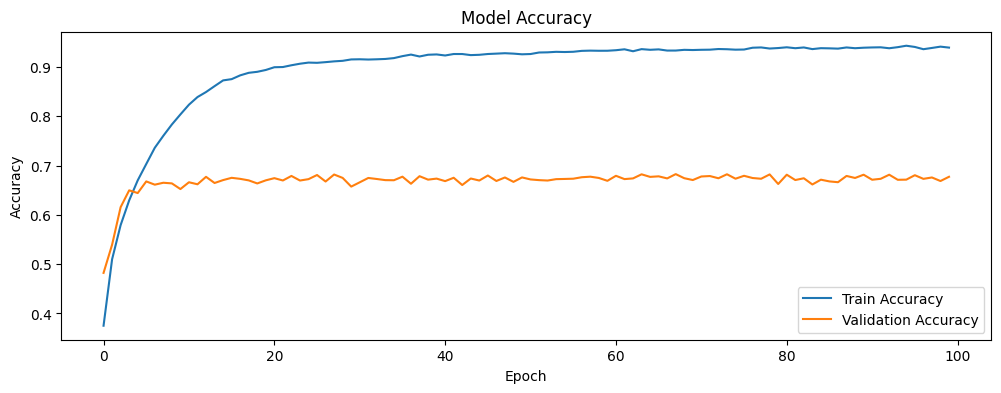

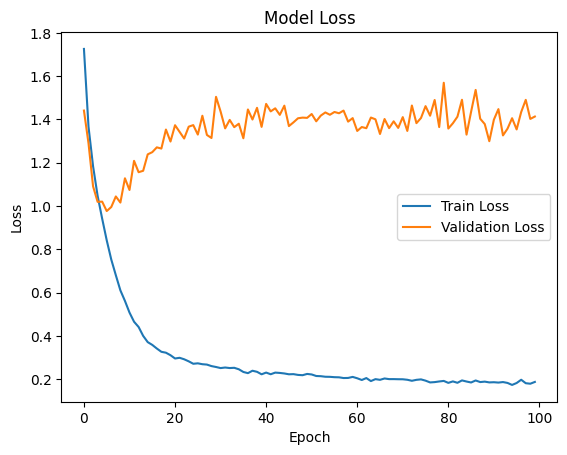

In [7]:
# Visualize accuracy
import matplotlib.pyplot as plt

# Visualize accuracy
plt.figure(figsize=(12, 4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Visualize loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()